In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import time

'''

'''

#matplotlib.use("pgf")

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 18
})

## Rates

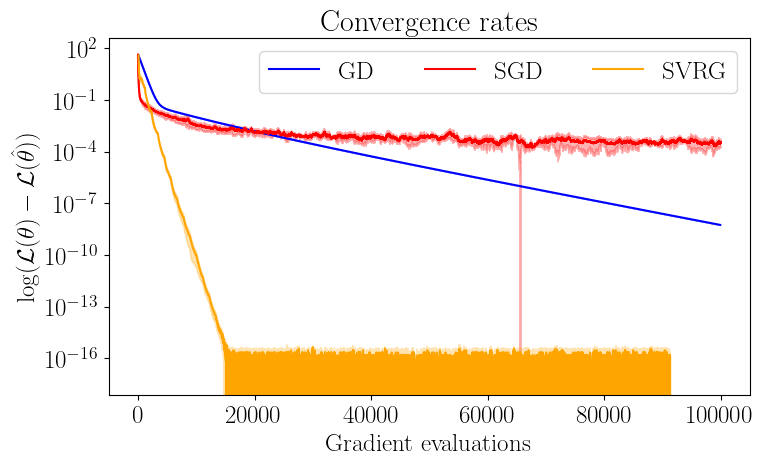

In [16]:
GD_FOs = []
GD = []
SGD_FOs = []
SGD = []
SVRG_FOs = []
SVRG = []

start = 0
end = -1
for method in ['GD', 'SGD', 'SVRG']:
    for i in range(3):
        df = pd.read_csv(f'results/' + method + f'_seed{i}_n100_d10_alpha0.5_sigma1_lambda0_T100000.csv')
        if method == 'GD':
            GD_FOs.append(df['FOs'][start:end])
            GD.append(df['Loss_train'][start:end] - df['Optimal_loss_train'][start:end])
        elif method == 'SGD':
            SGD_FOs.append(df['FOs'][start:end])
            SGD.append(df['Loss_train'][start:end] - df['Optimal_loss_train'][start:end])
        else:
            SVRG_FOs.append(df['FOs'][start:end])
            SVRG.append(df['Loss_train'][start:end] - df['Optimal_loss_train'][start:end])

GD_FOs = np.array(GD_FOs)
GD = np.array(GD)
SGD_FOs = np.array(SGD_FOs)
SGD = np.array(SGD)
SVRG_FOs = np.array(SVRG_FOs)
SVRG = np.array(SVRG)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

for method, color in zip(['GD', 'SGD', 'SVRG'], ['blue', 'red', 'orange']):
    if method == 'GD':
        ax.plot(GD_FOs.mean(axis=0), GD.mean(axis=0), label=method, color=color)
        ax.fill_between(GD_FOs.mean(axis=0), GD.mean(axis=0)-GD.std(axis=0), GD.mean(axis=0)+GD.std(axis=0), alpha=0.3, color=color)
    elif method == 'SGD':
        ax.plot(SGD_FOs.mean(axis=0), SGD.mean(axis=0), label=method, color=color)
        ax.fill_between(SGD_FOs.mean(axis=0), SGD.mean(axis=0)-SGD.std(axis=0), SGD.mean(axis=0)+SGD.std(axis=0), alpha=0.3, color=color)
    else:
        ax.plot(SVRG_FOs.mean(axis=0), SVRG.mean(axis=0), label=method, color=color)
        ax.fill_between(SVRG_FOs.mean(axis=0), SVRG.mean(axis=0)-SVRG.std(axis=0), SVRG.mean(axis=0)+SVRG.std(axis=0), alpha=0.3, color=color)

ax.legend(ncol=3)
ax.set_yscale('log')
ax.set_xlabel('Gradient evaluations')
ax.set_ylabel('$\\log(\\mathcal{L}(\\theta) - \mathcal{L}(\\hat{\\theta}))$')
ax.set_title('Convergence rates')
fig.tight_layout()
fig.savefig('plots/rates.pdf', bbox_inches='tight', dpi=300)

## Generalization gap

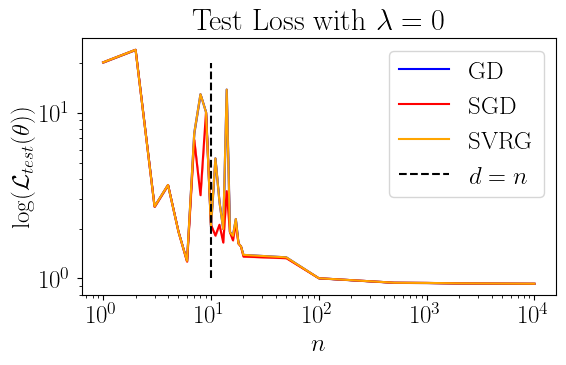

In [61]:

df = pd.read_csv(f'results/Generalization_vs_n_d10_alpha0.5_sigma1_lambda0.csv')
       
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for method, color in zip(['GD', 'SGD', 'SVRG'], ['blue', 'red', 'orange']):
    df_method = df[(df['method'] == method)]

    ax.plot(df_method['n'], df_method['Loss_test_mean'], label=method,color=color)
    ax.fill_between(df_method['n'], np.array(df_method['Loss_test_mean']) - np.array(df_method['Gap_std']), np.array(df_method['Loss_test_mean']) + np.array(df_method['Gap_std']),alpha=0.3,color=color)

ax.vlines(10, 1, 20, color='black', linestyle='--', label='$d=n$')

ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xticks(df['n'])
ax.set_xlabel('$n$')
ax.set_ylabel('$\\log(\\mathcal{L}_{test}(\\theta))$')
ax.set_title('Test Loss with $\lambda=0$')
fig.tight_layout()
fig.savefig('plots/generalization.pdf', bbox_inches='tight', dpi=300)

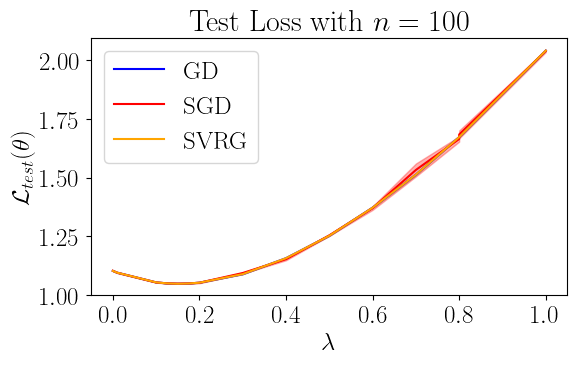

In [47]:

df = pd.read_csv(f'results/Generalization_vs_lambda_d10_alpha0.5_sigma1_n100.csv')
       
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for method, color in zip(['GD', 'SGD', 'SVRG'], ['blue', 'red', 'orange']):
    df_method = df[(df['method'] == method)]

    ax.plot(df_method['lambda'], df_method['Loss_test_mean'], label=method,color=color)
    ax.fill_between(df_method['lambda'], np.array(df_method['Loss_test_mean']) - np.array(df_method['Loss_test_std']), np.array(df_method['Loss_test_std']) + np.array(df_method['Loss_test_mean']),alpha=0.3,color=color)

ax.legend()
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xticks(df['n'])
ax.set_xlabel('$\\lambda$')
ax.set_ylabel('$\\mathcal{L}_{test}(\\theta)$')
ax.set_title('Test Loss with $n=100$')
fig.tight_layout()
fig.savefig('plots/generalization_lambda.pdf', bbox_inches='tight', dpi=300)

## Making the problem ill-conditioned

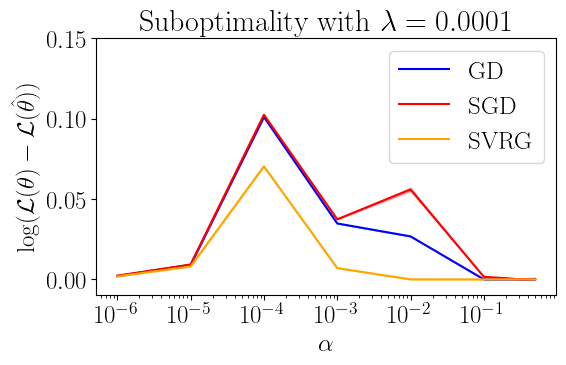

In [60]:

lambda_reg = 0.0001
df = pd.read_csv(f'results/Alpha_exp_d10_lambda{lambda_reg}_sigma1_n100.csv')
       
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for method, color in zip(['GD', 'SGD', 'SVRG'], ['blue', 'red', 'orange']):
    df_method = df[(df['method'] == method) & (df['alpha'] != 1.0)]

    ax.plot(1-np.array(df_method['alpha']), np.array(df_method['Loss_train_mean']) - np.array(df_method['Loss_optimal']), label=method,color=color)
    ax.fill_between(1-np.array(df_method['alpha']), np.array(df_method['Loss_train_mean']) - np.array(df_method['Loss_optimal']) - np.array(df_method['Loss_train_std']), np.array(df_method['Loss_train_mean']) - np.array(df_method['Loss_optimal']) + np.array(df_method['Loss_train_std']),alpha=0.3,color=color)

ax.legend()
#ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xticks(df['n'])
ax.set_xlabel('$\\alpha$')

ax.set_ylim([-0.01,0.15])
ax.set_ylabel('$\\log(\\mathcal{L}(\\theta) - \mathcal{L}(\\hat{\\theta}))$')
ax.set_title(f'Suboptimality with $\\lambda = {lambda_reg}$')
fig.tight_layout()
fig.savefig(f'plots/Gap_alpha_{lambda_reg}.pdf', bbox_inches='tight', dpi=300)